# LINEAR REGRESSION


Linear regression is a statistical method that predicts the relationship between two variables. It uses a linear equation to model the relationship between an unknown dependent variable and a known independent variable. 


# USE CASE: SCORE PREDICTION
## Problem Statement: Build a model to predict salary based on years of experience

In [9]:
#we will import sufficient libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Make sure this line is included
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
#LOADING THE DATASET
df = pd.read_csv(r"C:\Users\Hp\Desktop\salaryexp.csv")

In [7]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


## Split dataset into X & Y

In [11]:
X=df.iloc[:,: -1].values #independent variable(experience)
Y=df.iloc[:, -1].values #dependent variable(salary)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
Y #difference between print(y) and y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

# Exploratory Data Analysis (EDA)))

In [13]:
# Display basic statistics of the dataset
data = pd.read_csv(r"C:\Users\Hp\Desktop\salaryexp.csv")
print(data.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [14]:
df.shape

(30, 2)

In [15]:
print(data.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


Text(0, 0.5, 'Salary')

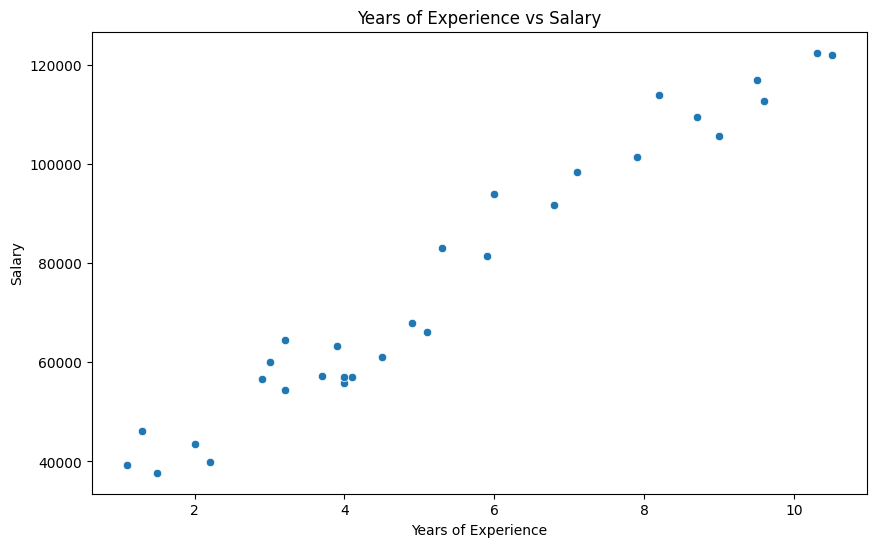

In [16]:
# Visualize the relationship between YearsExperience and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=data)
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


# Divide the dataset into trainin(80%) and testing(20%)

In [18]:
#divide the dataset into trainin(80%) and testing (20%)
X = data[['YearsExperience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [19]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
intercept = model.intercept_
coefficients = model.coef_

print(f'Intercept: {intercept}')
print(f'Coefficient: {coefficients}')


Intercept: 25321.583011776813
Coefficient: [9423.81532303]


In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [21]:
y_test

27    112635
15     67938
23    113812
17     83088
8      64445
9      57189
Name: Salary, dtype: int64

# Visualize the regression line

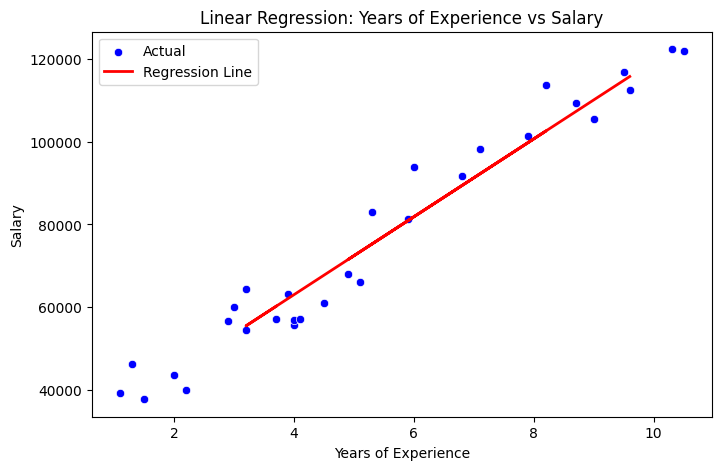

In [22]:
# Visualize the regression line with a smaller figure size
plt.figure(figsize=(8, 5))  # Adjust the size as needed
# Scatter plot of the actual data points (test set)
sns.scatterplot(x='YearsExperience', y='Salary', data=data, label='Actual', color='blue')
# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


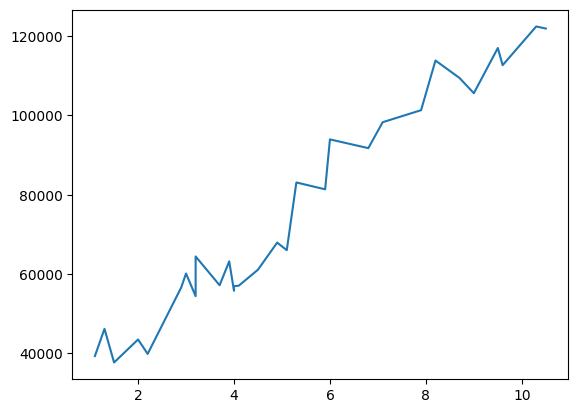

In [23]:
plt.plot(X,Y)
plt.show()

## Calculate Mean Absolute Error (MAE)

In [30]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict the target variable for the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

6286.453830757749

## Calculate Mean Squared Error (MSE)

In [33]:
mse = mean_squared_error(y_test, y_pred)
mse

49830096.85590839

## Calculate RMSE

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


7059.04362190151

## Calculate R-squared (R2) score



In [26]:
r2 = r2_score(y_test, y_pred)
r2

0.9024461774180497